# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

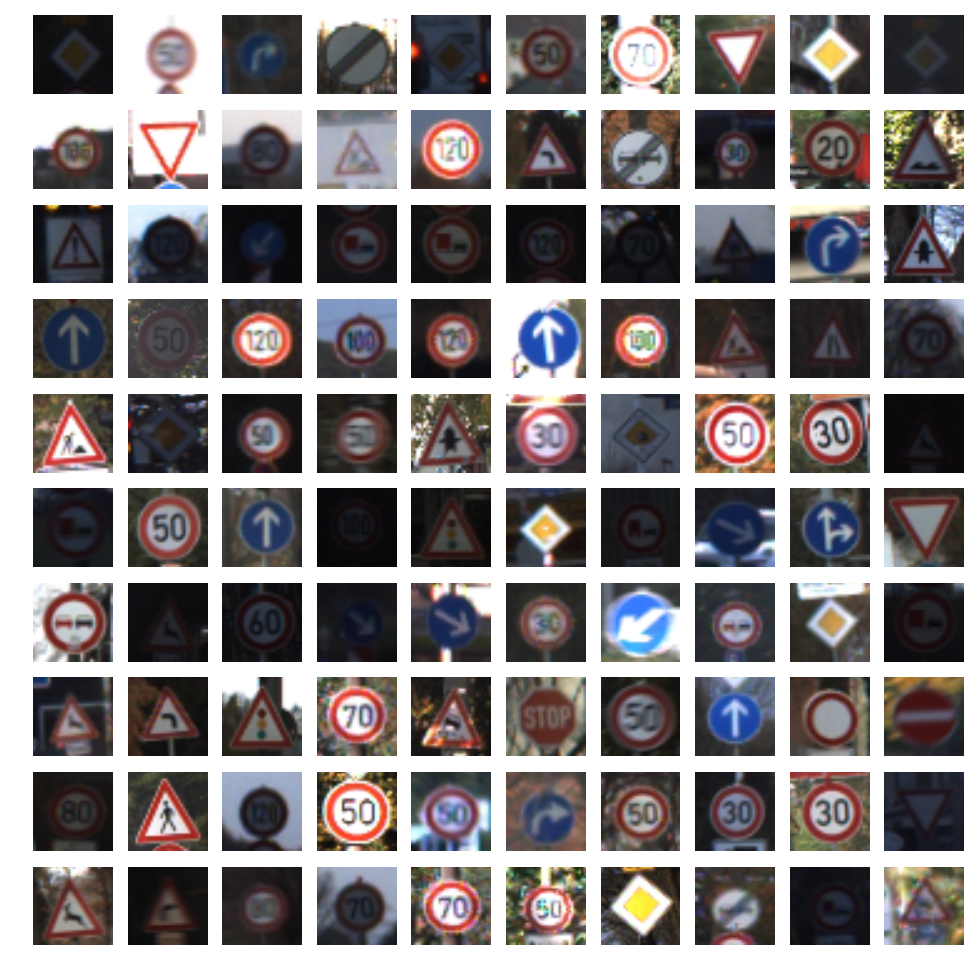

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline


# Plot a bunch of random images from the training dataset
plt.figure(figsize=(12,12))
for i in range(1,101):
    plt.subplot(10, 10, i)
    index = random.randint(0,len(X_train)-1)
    plt.imshow(X_train[index])
    plt.axis('off')
    
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np
from sklearn.utils import shuffle

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Mean-normalize the images, so that it would work well even for much deeper networks
print (np.amin(X_train), np.amax(X_train))
X_train_norm = X_train.astype(int) - 128
print (np.amin(X_train_norm), np.amax(X_train_norm))

0 255
-128 127


(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

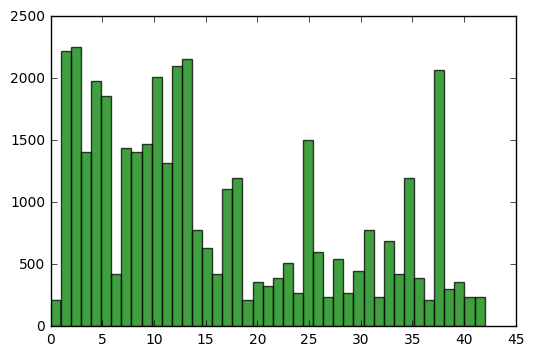

In [5]:
# Verify if distribution of labels is somewhat uniform
plt.hist(y_train, n_classes, facecolor='green', alpha=0.75)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I did 2 things:

1) Mean normalized the data. As the natural range is 0,255. I just subtracted 128 so that the mean is 0. This would help training speed, especially if we decide to add many more layers later on

2) I shuffled the dataset. Initially they were arranged sequentially in terms of classifications. This will help with batching.

Also, clearly, the object distribution is not that uniform. While there are some objects with 2000+ labelled examples, there are many objects with only a few hundred images in the training set. Let's address this problem later if the data seems insufficient (or if the accuracy seems low on these examples), perhaps by generating more samples. 

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split as tts

X_training, X_validation, y_training, y_validation = tts(X_train, y_train, test_size=0.2, random_state=42)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

For the first pass, I did not generate any additional data. I'd like to run a model first, plot some learning curves, look at accuracy and then decide if we need to collect more data. 

Also, I split the training set 80%:20% in to training and cross-validation sets.

In [7]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.  
    # I might use 18 filters here to account for the 3X higher info in the 3 R, G, B layers compared to the MNIST data. 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Initially I simply modified the LeNet architecture to handle an RGB input and 43 output classes. Let's call this the LeNet0 model. Based on the validation accuracy of this model and the learning curves, we'll figure out what we can do to improve accuracy.

In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

## Setting up the optimization problem
rate = tf.placeholder(tf.float32, shape=[])

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
## Evaluation metrics and more

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
from tqdm import tqdm

train_scores = []
validation_scores = []
rate_set = 0.001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        # Progress bar
        batches_pbar = tqdm(range(0, num_examples, BATCH_SIZE), \
                                desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')

        for offset in batches_pbar:
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: rate_set})
            
        training_accuracy = evaluate(X_train, y_train) 
        train_scores.append(training_accuracy)
        validation_accuracy = evaluate(X_validation, y_validation) 
        validation_scores.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet0.ckpt')
    print("Model saved")
    

Training...



Epoch  1/10: 100%|██████████| 307/307 [00:43<00:00,  7.11batches/s]


EPOCH 1 ...
Training Accuracy = 0.796
Validation Accuracy = 0.802



Epoch  3/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 2 ...
Training Accuracy = 0.910
Validation Accuracy = 0.913



Epoch  4/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 3 ...
Training Accuracy = 0.952
Validation Accuracy = 0.952



Epoch  5/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 4 ...
Training Accuracy = 0.957
Validation Accuracy = 0.959



Epoch  6/10:   0%|          | 1/307 [00:00<00:36,  8.37batches/s]

EPOCH 5 ...
Training Accuracy = 0.966
Validation Accuracy = 0.966



Epoch  7/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 6 ...
Training Accuracy = 0.974
Validation Accuracy = 0.974



Epoch  8/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 7 ...
Training Accuracy = 0.975
Validation Accuracy = 0.977



Epoch  9/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 8 ...
Training Accuracy = 0.976
Validation Accuracy = 0.979



Epoch  9/10: 100%|██████████| 307/307 [00:43<00:00,  7.08batches/s]


EPOCH 9 ...
Training Accuracy = 0.983
Validation Accuracy = 0.982



Epoch 10/10: 100%|██████████| 307/307 [00:44<00:00,  6.88batches/s]


EPOCH 10 ...
Training Accuracy = 0.962
Validation Accuracy = 0.961

Model saved


#### Baseline Accuracy of the LeNet model: Lenet0

So the training and testing pipeline works. With the default AdamOptimizer, 10 epochs, 0.001 learning rate and the default Lenet Architecture we're got a validation accuracy of ~98%. 

Now I'd like to improve this accuracy by:

1) Finding **classes that were wrongly classified** to identify patterns

2) Just running more epochs, until the validation score stops rising

3) Run a **learning curve** experiment to understand what next steps we can take, such as include dropout layers, regularization on the weights, more complex architecture (deeper models, more filters etc), generating more data etc. based on whether the model has high biad or high variance. 


#### Running more epochs

It seems like the learning has flat-lined. So next, let's push this model with more epochs, but with a smaller learing rate

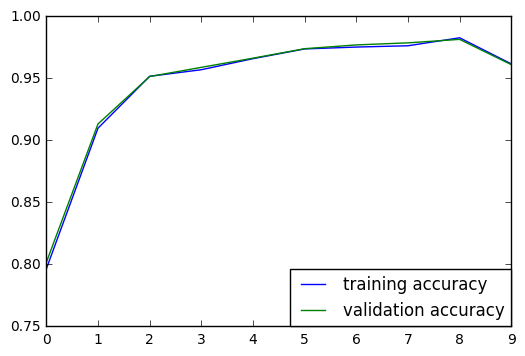

In [13]:
plt.plot(train_scores, label="training accuracy")
plt.plot(validation_scores, label="validation accuracy")
plt.legend(loc=0, borderaxespad=0.)

plt.show()

16

In [ ]:
# Run 10 more epochs but with a smaller learning rate

rate_set = 0.0002
train_scores = train_scores[:10]
validation_scores = validation_scores[:10]

with tf.Session() as sess:
    
    # restore saved model that was run with 10epochs
    new_saver = tf.train.import_meta_graph('lenet0.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    all_vars = tf.get_collection('vars')
    for v in all_vars:
        v_ = sess.run(v)
        print(v_)

    
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        # Progress bar
        batches_pbar = tqdm(range(0, num_examples, BATCH_SIZE), \
                                desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')

        for offset in batches_pbar:
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: rate_set})
            
        training_accuracy = evaluate(X_train, y_train) 
        train_scores.append(training_accuracy)
        validation_accuracy = evaluate(X_validation, y_validation) 
        validation_scores.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.6f}".format(training_accuracy))
        print("Validation Accuracy = {:.6f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet0_20_epochs.ckpt')
    print("Model saved")


Training...




Epoch  1/10:   1%|▏         | 4/307 [00:00<00:45,  6.61batches/s]
Exception in thread Thread-21:
Traceback (most recent call last):
  File "/root/miniconda3/envs/carnd_term_1/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/root/miniconda3/envs/carnd_term_1/lib/python3.5/site-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/root/miniconda3/envs/carnd_term_1/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Epoch  2/10:   0%|          | 0/307 [00:00<?, ?batches/s]

EPOCH 1 ...
Training Accuracy = 0.996582
Validation Accuracy = 0.996812



Epoch  2/10: 100%|██████████| 307/307 [00:42<00:00,  7.27batches/s]


#### Finding classes that were wrongly classified to identify patterns

This will help us understand if we're overfitting, underfitting etc.

#### Learning Curves

This will help us understand if we're overfitting, underfitting etc.

In [ ]:
# Reset the default model on tensorflow


In [19]:
print(tf.__version__)

0.12.0


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.